# Project1:Evaluation Phase:Baseball Case Stusy

Objective:To develop an algorithm that predicts the number of wins for a given team
in the 2015 season based on several different indicators of success.

Problem Statement: This dataset utilizes data from 2014 Major League Baseball seasons in order to 
develop an algorithm that predicts the number of wins for a given team in the 2015 season based on 
several different indicators of success. There are 16 different features that will be used as the inputs
 to the machine learning    and the output will be a value that represents the number of wins. 
    
Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output: Number of predicted wins (W) which is our target variable.
    

In [2]:
#loading the required libraries
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [4]:
#loading the dataset
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
df.shape #there are 30 rows and 17 columns

(30, 17)

In [6]:
df.columns # refered from wikipedia baseball statistics https://en.wikipedia.org/wiki/Baseball_statistics

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E'], dtype='object')

Description of columns(refered wikipedia baseball statistics):
    
W:Win:- number of games where pi Triple: hits on which the batter reaches third base safely without the contribution of a fielding errortcher was pitching while their team took the lead and went on to win, also the starter 
        needs to pitch at least 5 innings of work (also related: winning percentage).
        
R:Runs scored:- times reached home plate legally and safely.

AB:AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.

H:Hit:- reaching base because of a batted, fair ball without error by the defense.
        
2B:Double:- hits on which the batter reaches second base safely without the contribution of a fielding error.
        
3B: Triple: hits on which the batter reaches third base safely without the contribution of a fielding error.
        
HR:Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
        
BB:BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded
        first base.
        
SO:(or K) – Strikeout: number of batters who received strike three.
        
SB:Stolen base: number of bases advanced by the runner while the ball is in the possession of the defens.
        
RA: Run average: number of runs allowed times nine divided by innings pitched.
        
ER: Earned run: number of runs that did not occur as a result of errors or passed balls.
        
ERA:Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
        
CG:Complete game: number of games where player was the only pitcher for their team.
        
SHO:Shutout: number of complete games pitched with no runs allowed.
        
SV:Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, 
     is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; 
     (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
        
E:E – Errors: number of times a fielder fails to make a play he should have made with common effort, 
      and the offense benefits as a result.    

    

In [7]:
#renaming columns which will clearly reflect the meanings 
df.rename(columns={'W':'Win','R':'Runs_scored','AB':'At_bat','H':'Hit','2B':'Double','3B':'Triple','HR':'Home_runs','BB':'Base_on_balls',
                  'SO':'Strike_out','SB':'Stolen_base','RA':'Run_average','ER':'Earned_run','ERA':'Earned_run_average','CG':'Complete_game',
                   'SHO':'Shoutout','SV':'Save','E':'Errors'},inplace=True)

In [8]:
df

,Win,Runs_scored,At_bat,Hit,Double,Triple,Home_runs,Base_on_balls,Strike_out,Stolen_base,Run_average,Earned_run,Earned_run_average,Complete_game,Shoutout,Save,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [9]:
df.head() #shows first five data  

,Win,Runs_scored,At_bat,Hit,Double,Triple,Home_runs,Base_on_balls,Strike_out,Stolen_base,Run_average,Earned_run,Earned_run_average,Complete_game,Shoutout,Save,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [10]:
df.tail() #shows last 5 rows of the dataset 

,Win,Runs_scored,At_bat,Hit,Double,Triple,Home_runs,Base_on_balls,Strike_out,Stolen_base,Run_average,Earned_run,Earned_run_average,Complete_game,Shoutout,Save,Errors
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [11]:
df.sample(3) #show 3 random samples information of dataset

,Win,Runs_scored,At_bat,Hit,Double,Triple,Home_runs,Base_on_balls,Strike_out,Stolen_base,Run_average,Earned_run,Earned_run_average,Complete_game,Shoutout,Save,Errors
18,68,655,5480,1378,274,34,145,412,1299,84,737,682,4.28,1,7,40,116
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
13,76,656,5544,1379,262,22,198,478,1336,69,726,677,4.16,6,12,45,94


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Win                 30 non-null     int64  
 1   Runs_scored         30 non-null     int64  
 2   At_bat              30 non-null     int64  
 3   Hit                 30 non-null     int64  
 4   Double              30 non-null     int64  
 5   Triple              30 non-null     int64  
 6   Home_runs           30 non-null     int64  
 7   Base_on_balls       30 non-null     int64  
 8   Strike_out          30 non-null     int64  
 9   Stolen_base         30 non-null     int64  
 10  Run_average         30 non-null     int64  
 11  Earned_run          30 non-null     int64  
 12  Earned_run_average  30 non-null     float64
 13  Complete_game       30 non-null     int64  
 14  Shoutout            30 non-null     int64  
 15  Save                30 non-null     int64  
 16  Errors    

There are 16 columns having datatype integer and one cloumn having float datatypes and no object type column is there
so no conversion(encoding) process needed.

In [13]:
non_obj = df.select_dtypes('number').columns.to_list()
non_obj

['Win',
 'Runs_scored',
 'At_bat',
 'Hit',
 'Double',
 'Triple',
 'Home_runs',
 'Base_on_balls',
 'Strike_out',
 'Stolen_base',
 'Run_average',
 'Earned_run',
 'Earned_run_average',
 'Complete_game',
 'Shoutout',
 'Save',
 'Errors']

In [14]:
df.isnull().sum() #no missing values are present so need of applying any imputation technique

Win                   0
Runs_scored           0
At_bat                0
Hit                   0
Double                0
Triple                0
Home_runs             0
Base_on_balls         0
Strike_out            0
Stolen_base           0
Run_average           0
Earned_run            0
Earned_run_average    0
Complete_game         0
Shoutout              0
Save                  0
Errors                0
dtype: int64

<AxesSubplot:>

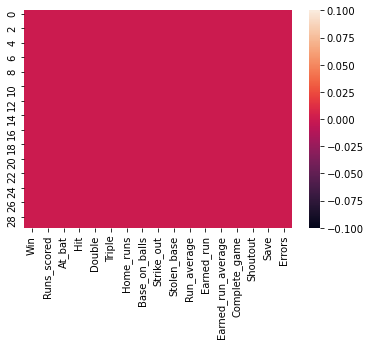

In [15]:
sns.heatmap(df.isnull())  

it shows visually that there is no null values present. if thers a null values then there would have been different colour shades in between

In [16]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Win,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs_scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At_bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hit,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Double,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triple,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home_runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base_on_balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike_out,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen_base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


Observation:
1.No missing value as count value is same.

2.Min. no of win is 66 and max. is 100

3.The min. run_scored is 573 and max run_scored is 891.

4.The min. no. of hits on which the batter reaches second base is 236 and max. is 308.

5.The min. no of hits on which the batter reaches the second base is 13 and max. is 49.

6.high gaps between max. and 75 % in win,run_scored,home_runs,strike_out,errors,stolen_base may indicate
that there is some outliers present.

7.High variance in strike_out. 

# UNIVARIANTE ANALYSIS

univariate analysis using distplot to see whether they are normally distributed or skewness present

<AxesSubplot:xlabel='Win', ylabel='Density'>

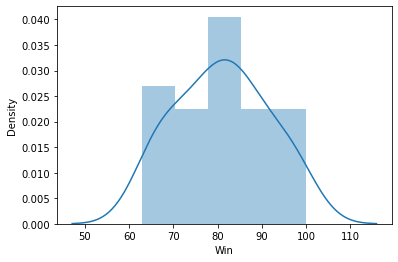

In [17]:
sns.distplot(df['Win']) 

This shows normal distribution ,no skewness present

<AxesSubplot:xlabel='Runs_scored', ylabel='Density'>

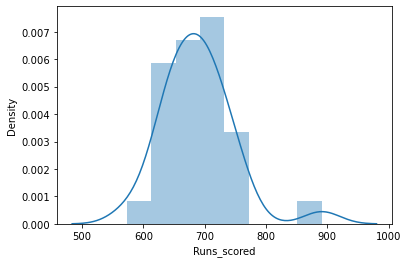

In [18]:
sns.distplot(df['Runs_scored']) 

This shows bimodal distribution,we need to remove skewness.

<AxesSubplot:xlabel='At_bat', ylabel='Density'>

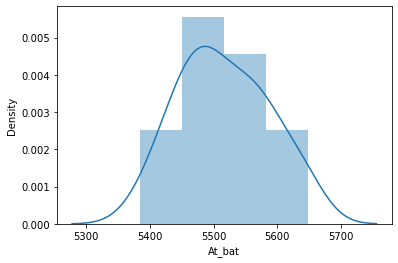

In [19]:
sns.distplot(df['At_bat']) 

This shows normal distribution ,no skewness present

<AxesSubplot:xlabel='Hit', ylabel='Density'>

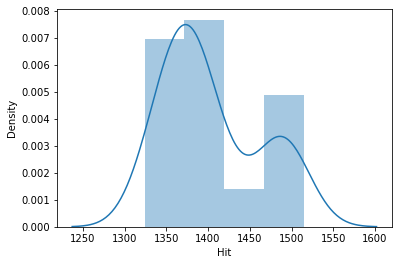

In [20]:
sns.distplot(df['Hit']) 

Skewness is there

<AxesSubplot:xlabel='Double', ylabel='Density'>

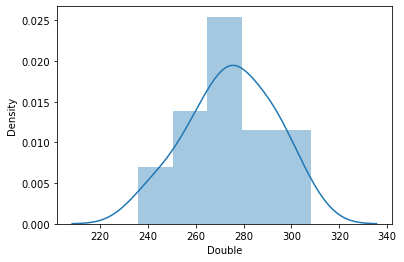

In [21]:
sns.distplot(df['Double']) 

The graph is normally distributed

<AxesSubplot:xlabel='Triple', ylabel='Density'>

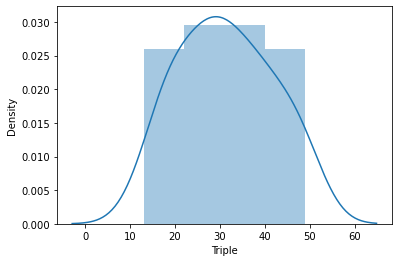

In [22]:
sns.distplot(df['Triple']) 

The graph is normally distributed,no skewness

<AxesSubplot:xlabel='Home_runs', ylabel='Density'>

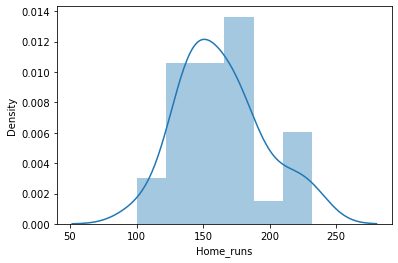

In [23]:
sns.distplot(df['Home_runs']) 

The graph is slighly normally distribued

<AxesSubplot:xlabel='Base_on_balls', ylabel='Density'>

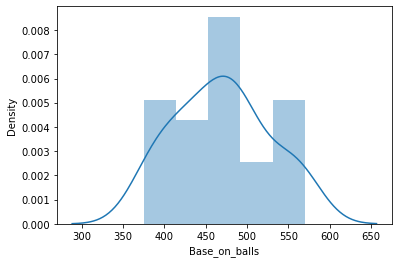

In [24]:
sns.distplot(df['Base_on_balls']) 

The distribution is normal and no skewness present

<AxesSubplot:xlabel='Strike_out', ylabel='Density'>

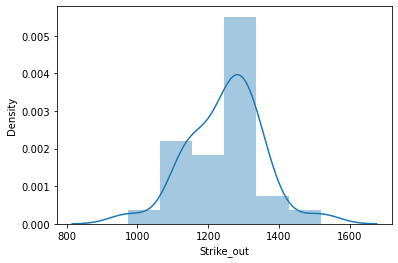

In [25]:
sns.distplot(df['Strike_out']) 

sligthly left skewed

<AxesSubplot:xlabel='Stolen_base', ylabel='Density'>

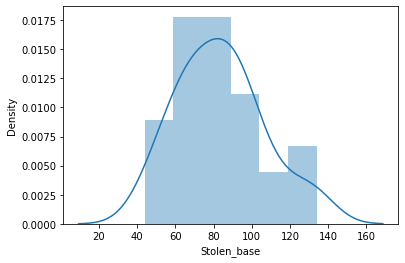

In [26]:
sns.distplot(df['Stolen_base']) 

normlly distributed

<AxesSubplot:xlabel='Run_average', ylabel='Density'>

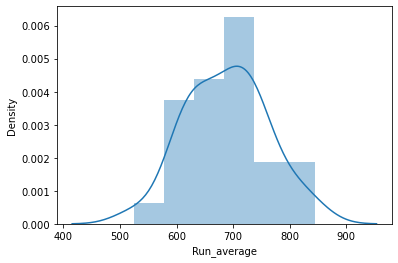

In [27]:
sns.distplot(df['Run_average']) 

normlly distributed

<AxesSubplot:xlabel='Earned_run', ylabel='Density'>

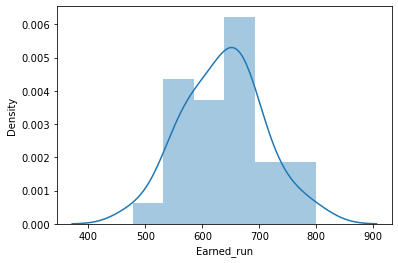

In [28]:
sns.distplot(df['Earned_run']) 

normlly distributed

<AxesSubplot:xlabel='Earned_run_average', ylabel='Density'>

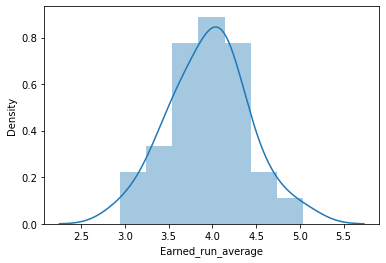

In [29]:
sns.distplot(df['Earned_run_average']) 

normlly distributed,no skewness present

<AxesSubplot:xlabel='Complete_game', ylabel='Density'>

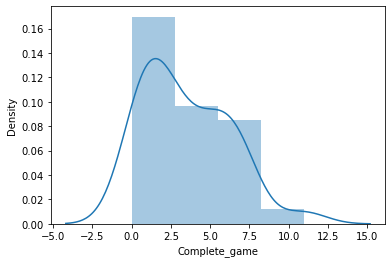

In [30]:
sns.distplot(df['Complete_game']) 

some variance is there is the graph

<AxesSubplot:xlabel='Shoutout', ylabel='Density'>

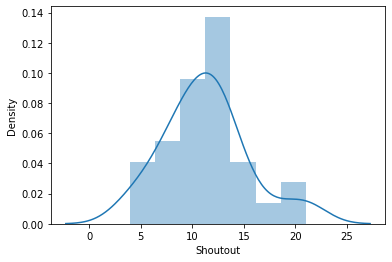

In [31]:
sns.distplot(df['Shoutout']) 

normlly distributed

<AxesSubplot:xlabel='Save', ylabel='Density'>

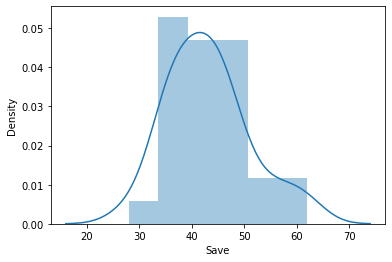

In [32]:
sns.distplot(df['Save']) 

normlly distributed

<AxesSubplot:xlabel='Errors', ylabel='Density'>

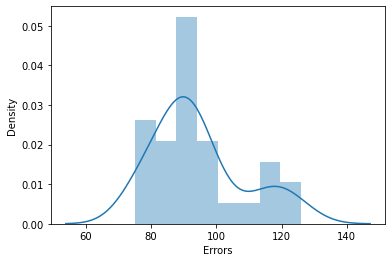

In [33]:
sns.distplot(df['Errors']) 

sligtly bimodal,

In [34]:
def univariateAnalysis_displot(non_obj,nbins):
    plt.figure(figsize=(5,5))
    print("----------------------------------------------------------------------------")
    sns.displot(df[non_obj], kde=True)#, color='blue')
    plt.title("Distribution of " + non_obj)
    plt.show()    
   

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

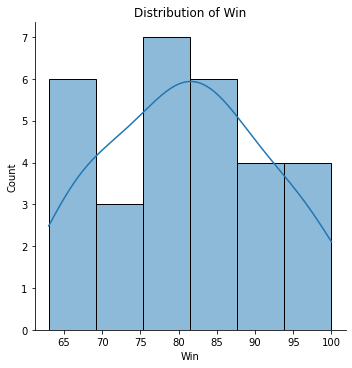

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

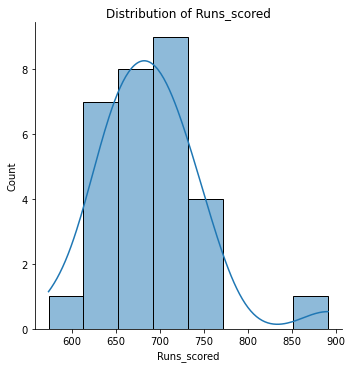

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

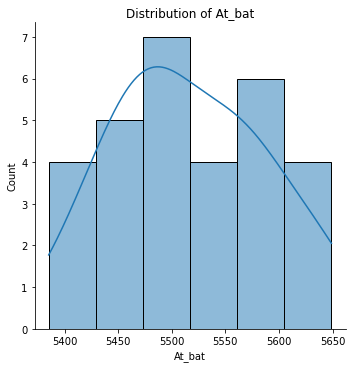

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

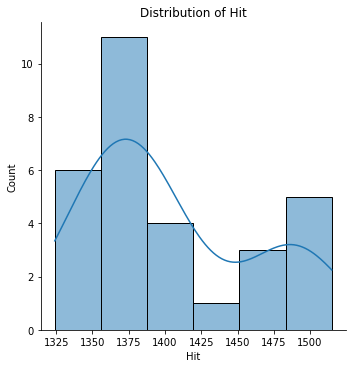

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

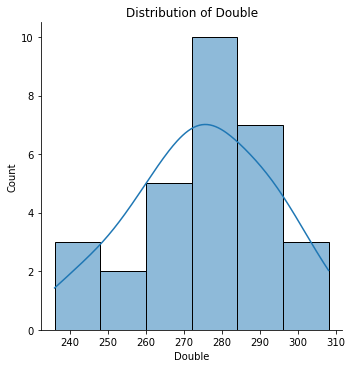

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

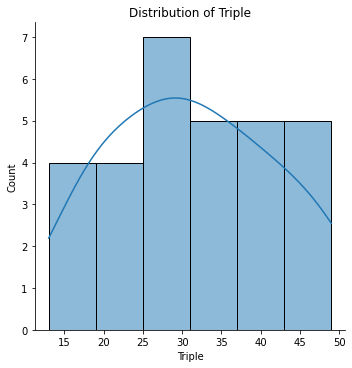

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

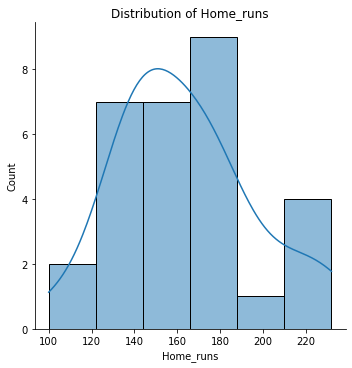

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

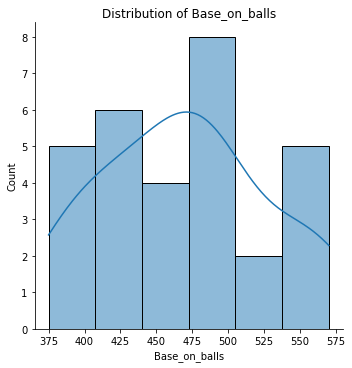

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

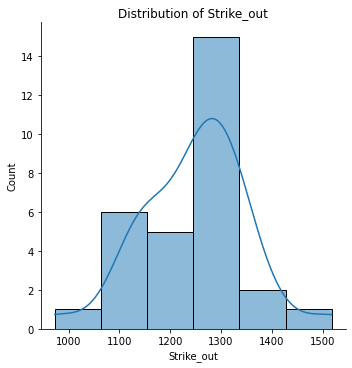

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

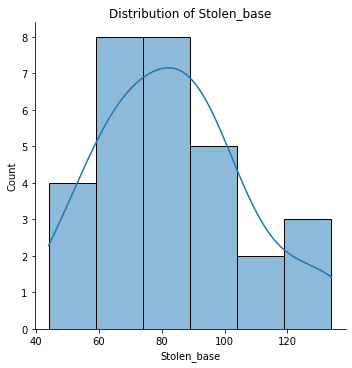

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

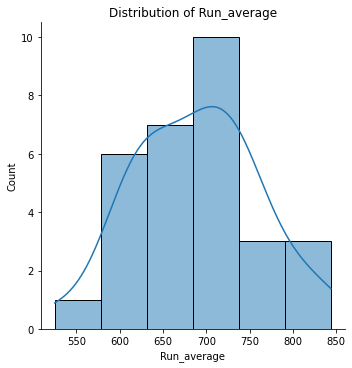

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

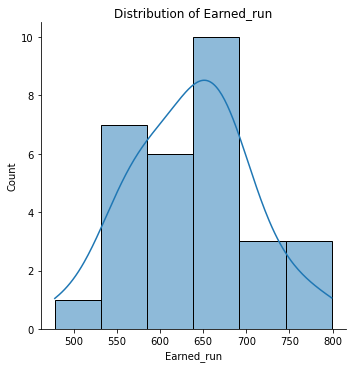

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

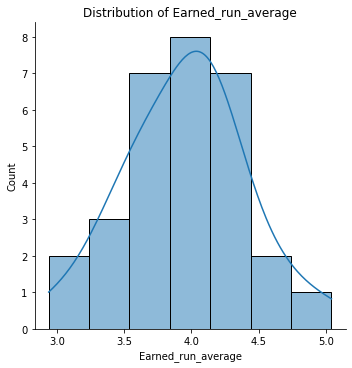

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

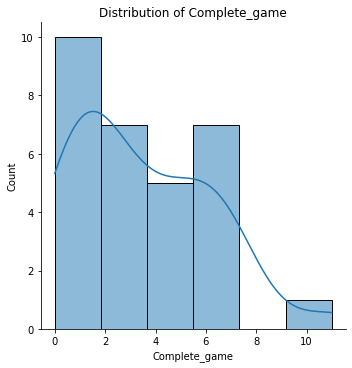

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

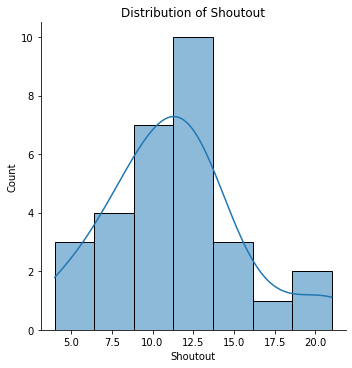

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

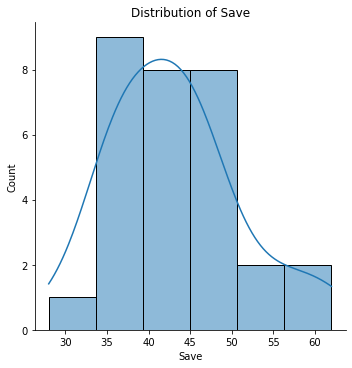

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

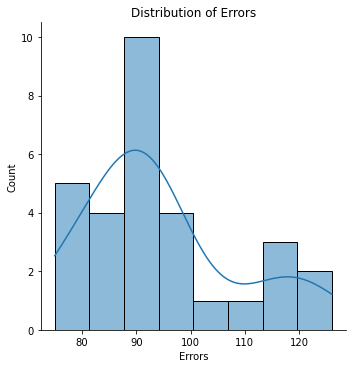

In [35]:
for x1 in non_obj:
    univariateAnalysis_displot(x1, 50);

Mostly normal distributed and some are right skewed.

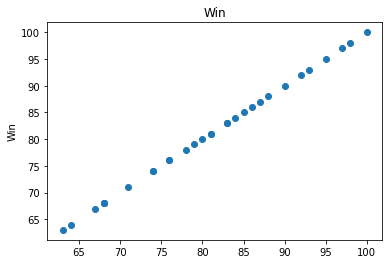

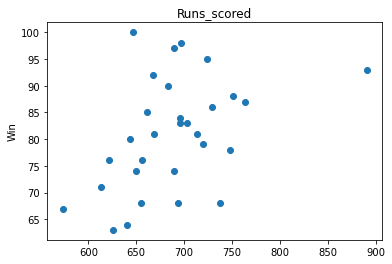

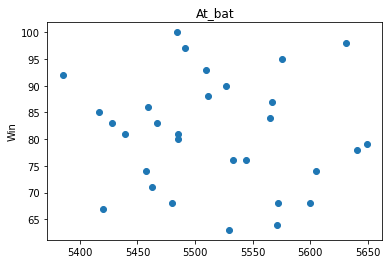

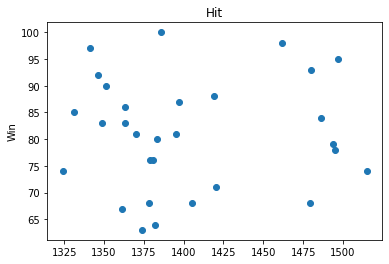

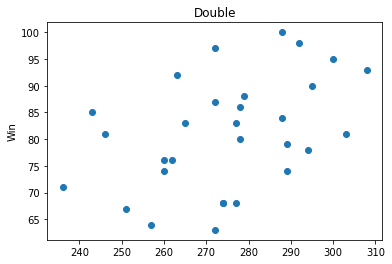

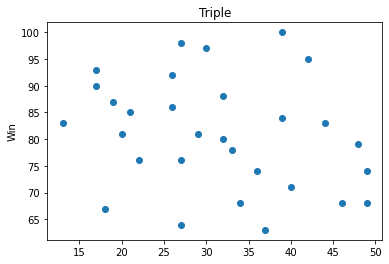

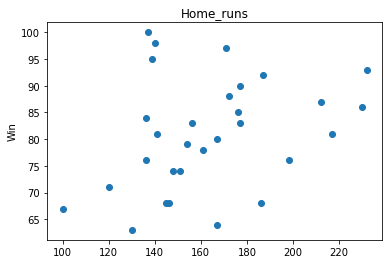

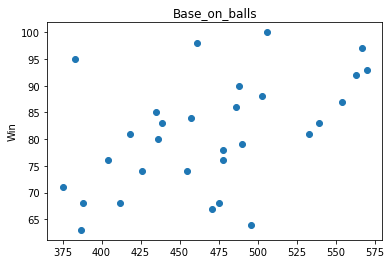

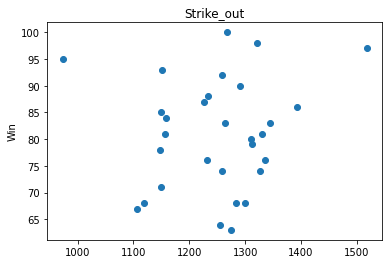

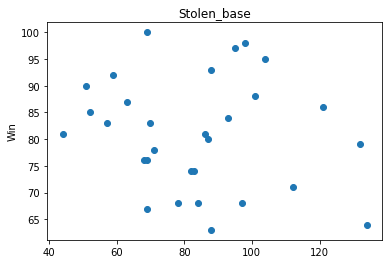

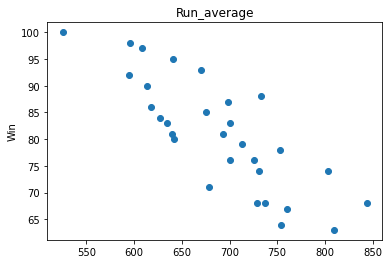

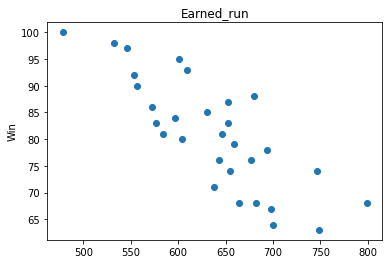

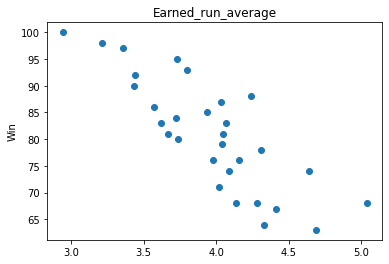

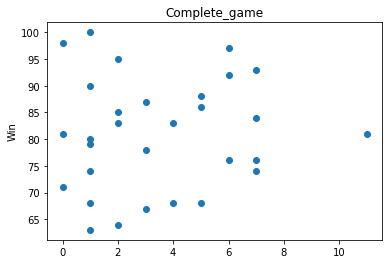

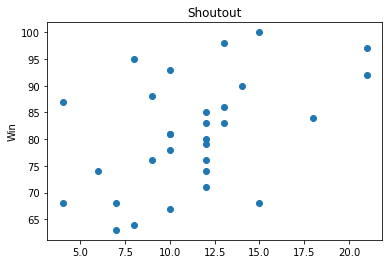

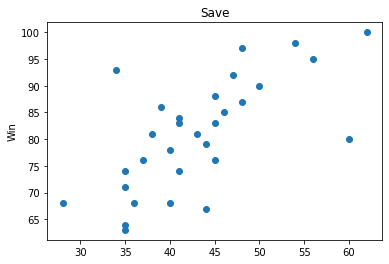

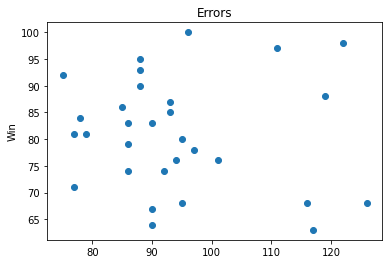

In [36]:
for numeric in non_obj:
    plt.scatter(df[numeric], df['Win'])
    plt.title(numeric)
    plt.ylabel('Win')
    plt.show()

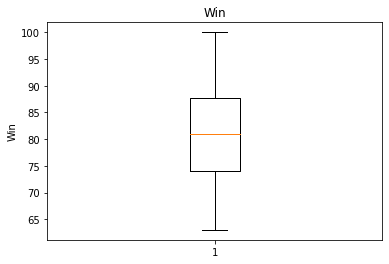

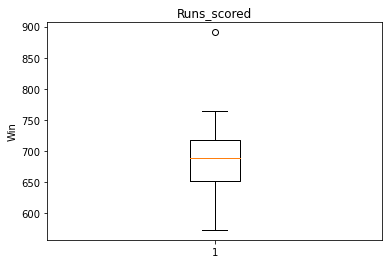

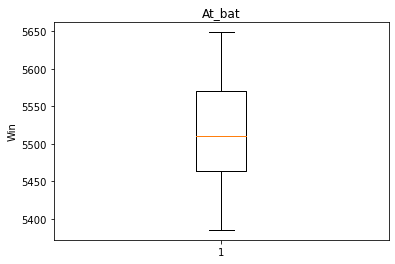

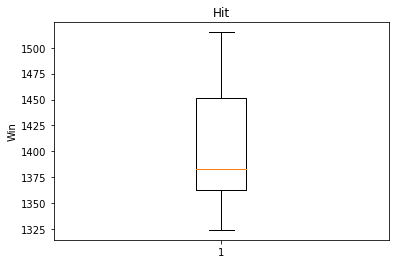

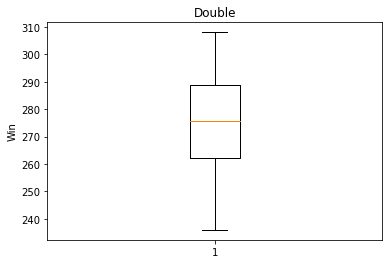

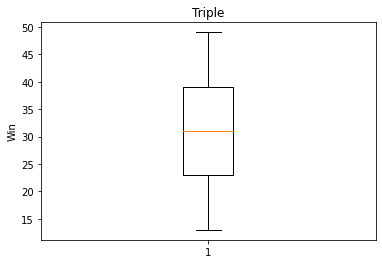

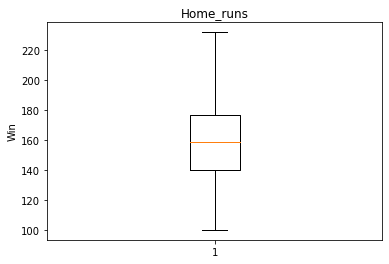

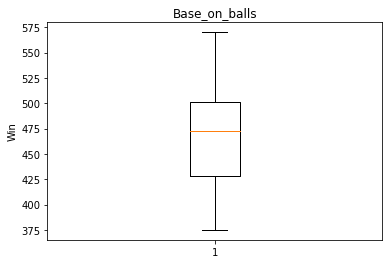

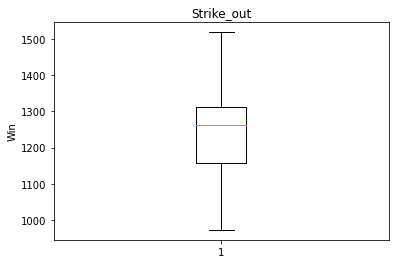

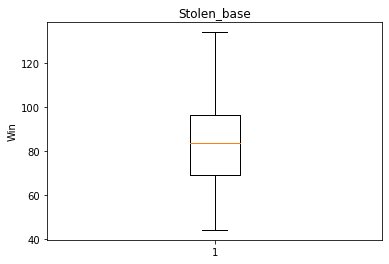

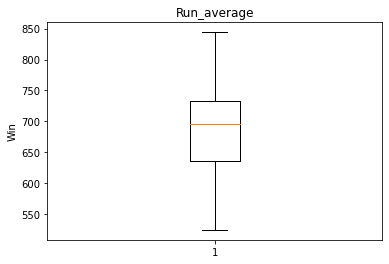

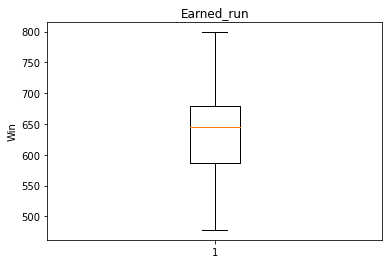

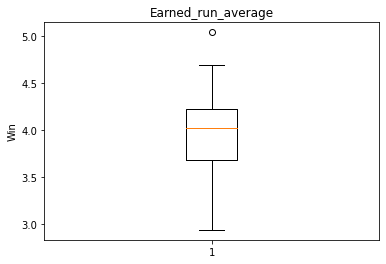

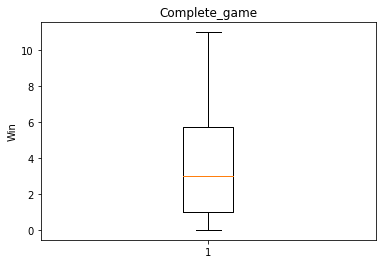

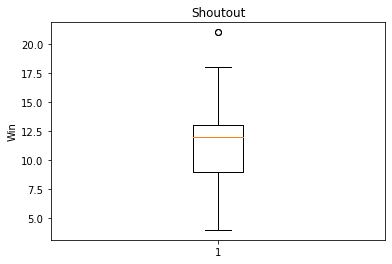

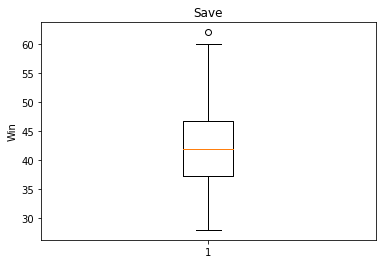

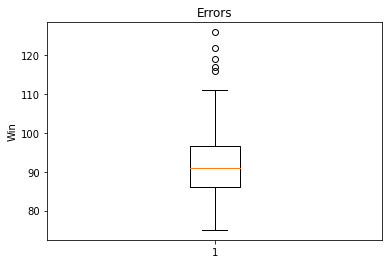

In [37]:
for numeric in non_obj:
    plt.boxplot(df[numeric])
    plt.title(numeric)
    plt.ylabel('Win')
    plt.show()

THus we can outliers are present in errors,save,shouout,earned_run_average and runs_scored whcih will be removed earlier.

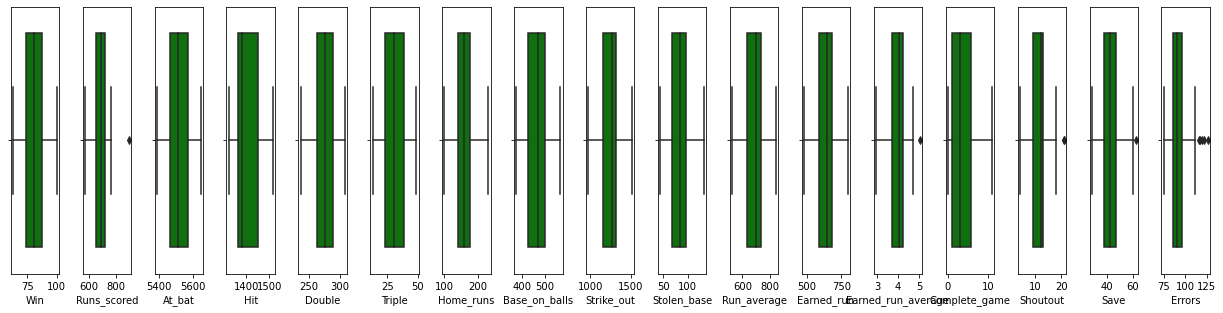

In [38]:
#checking ouliers via subplots..this shows same as above
import matplotlib.pyplot as plt
collist=df.columns.values
ncol=20
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()

# Bivariate Plot/Multivariate plot

scatter plot

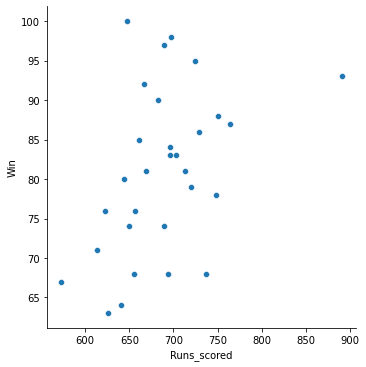

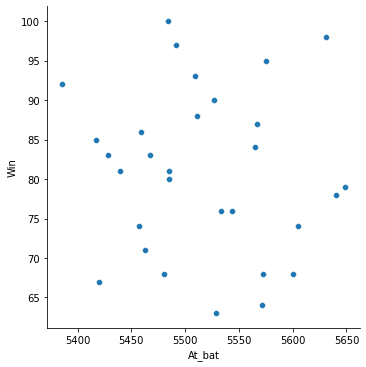

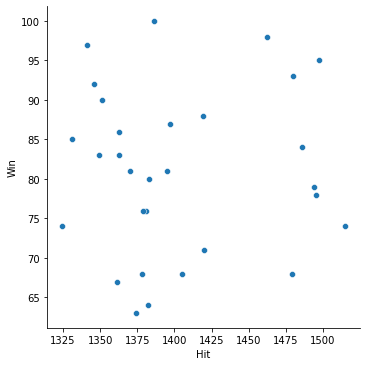

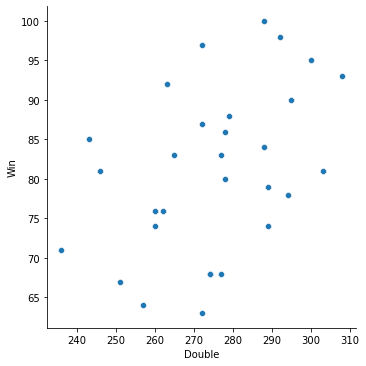

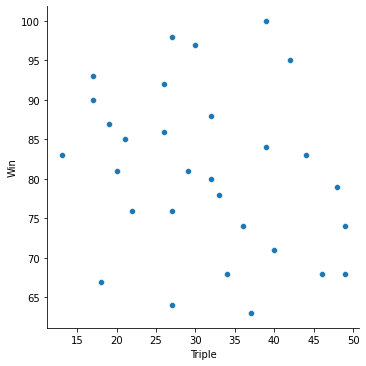

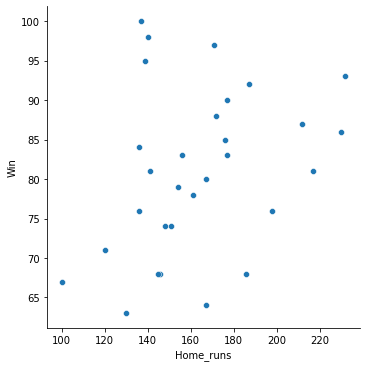

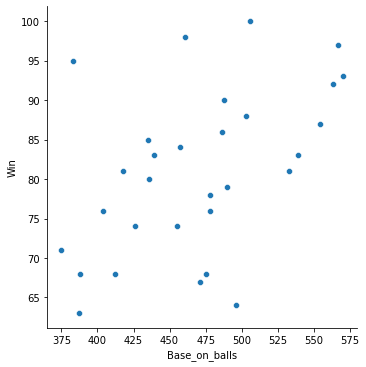

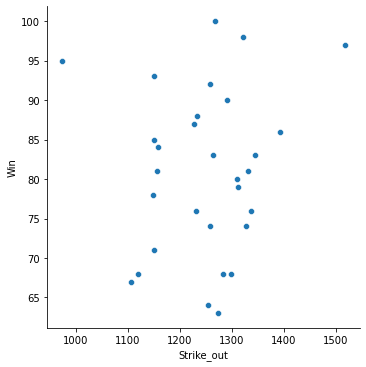

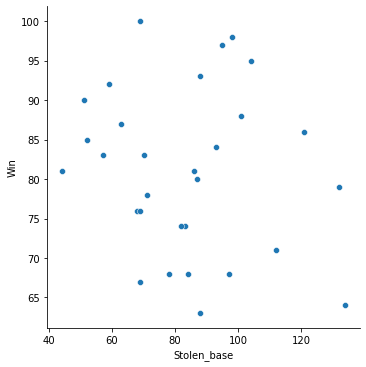

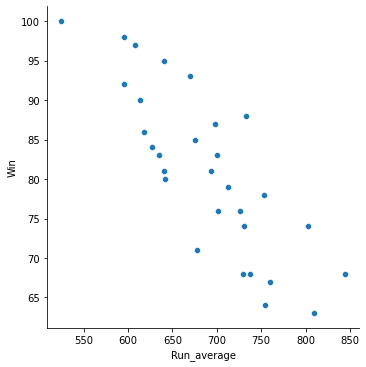

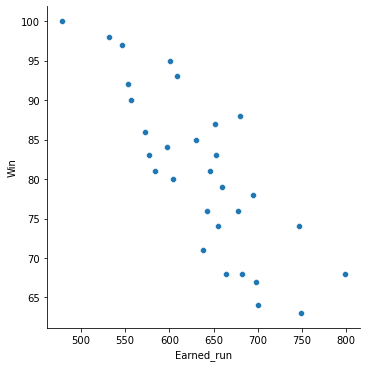

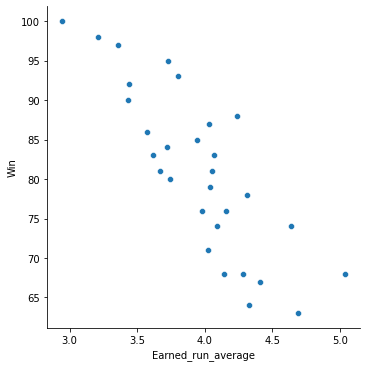

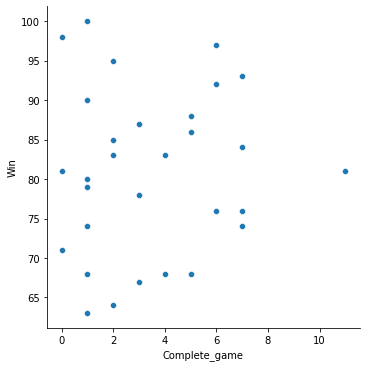

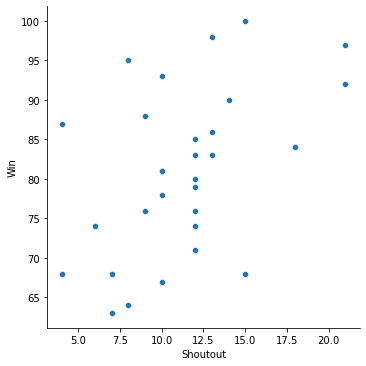

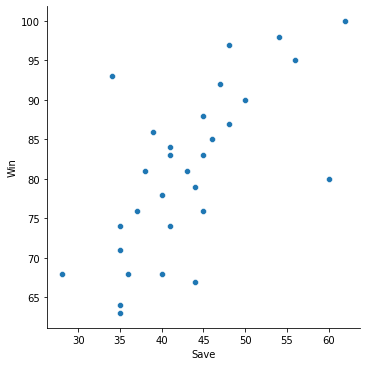

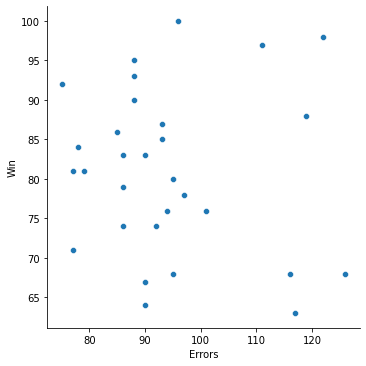

In [43]:
index = 0
indvar = df.drop("Win", axis=1)
for col, value in indvar.items():
    sns.relplot(x=col, y="Win",data=df)
    index += 1
plt.show()

By Observing all the features with respect to Win(our target variabla),some features are directly proportional to target variale,
some are inversely proportional to target variable and some are showing no relation,almost scattered

1.As the Runs_scored increases, the chances of winning also increases.

2.At_bat :As the At_bat increases,chances of wining also increases.
    
3.Hits:Hits is almost scattered and doesnt show trend with wining.
    
4.Double&Triple : Ad the Double & Triple increases(striker going to the second base),the chances of winning also increases.
    
5.Home_runs:It is direclty proportional to chances of winning .
    
6.Base_on_balls:Directly proportional to winning.
    
7.Strike_out:As strike_out incraeses,chances of winning increases for opponent team.
    
8 Stolen_base:Directly proporational to winning of oppoenet team.
    
9. Earned_run_average,runs, earned_run is decreased ,then winning chances also increases for opponent team

10.If the shoutout increases,the chnaces of winning incareses for opponent team as pitcher doesnt allow the 
striker to complete the run.

11.if there are more errors in the match by the opponent team e.g throwing error,fielding error etc,
automatically chnaces of winning will increases for striker team

LM Plot

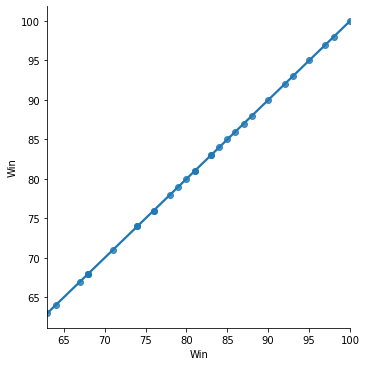

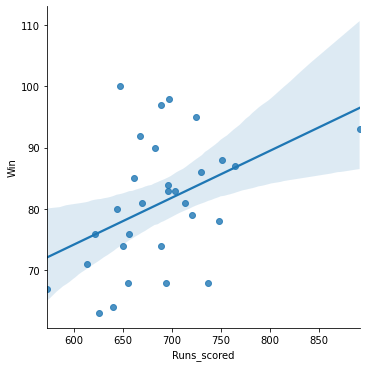

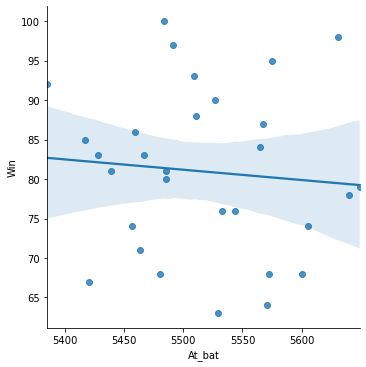

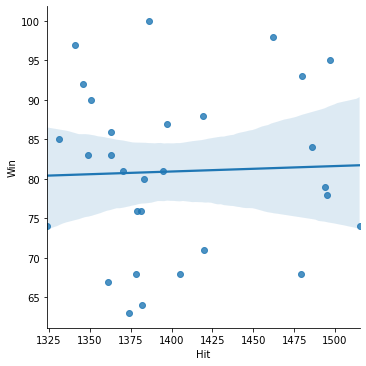

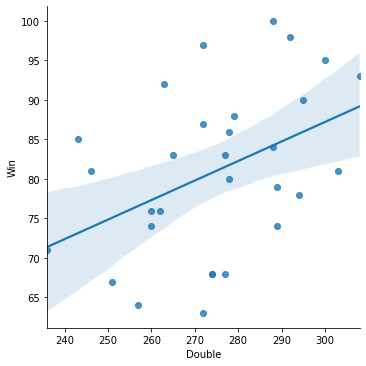

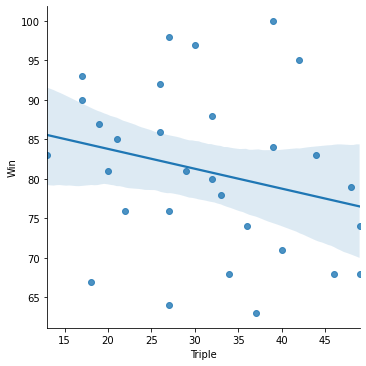

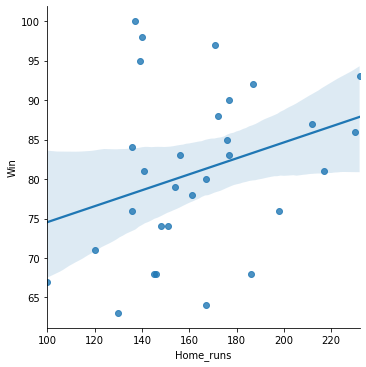

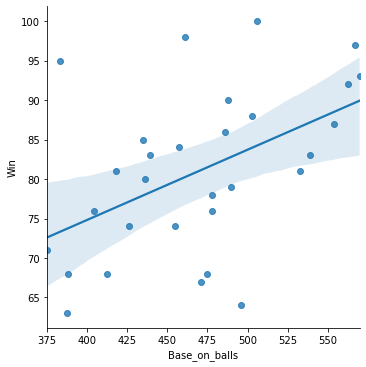

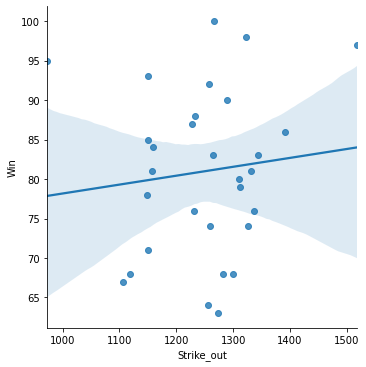

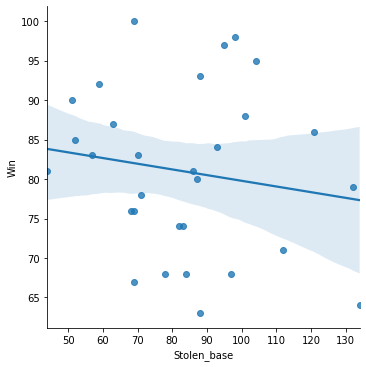

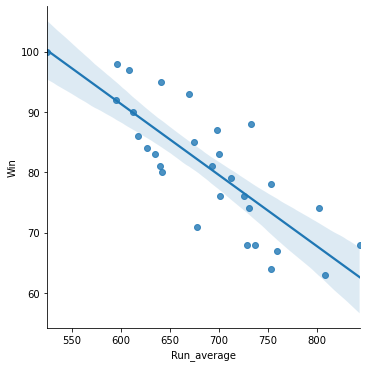

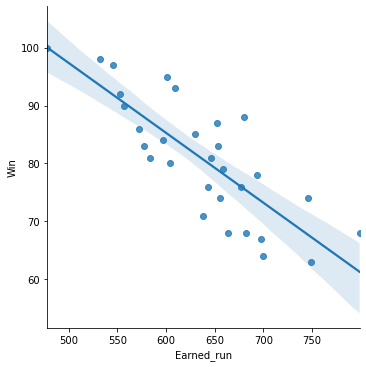

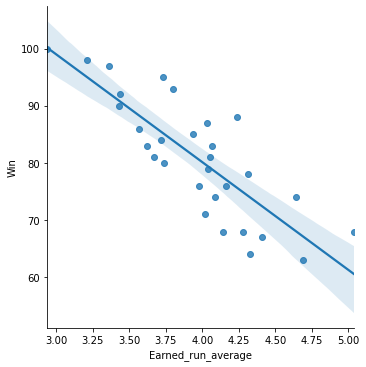

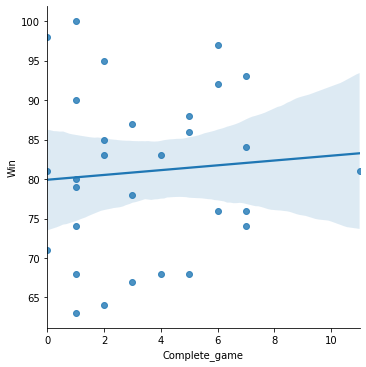

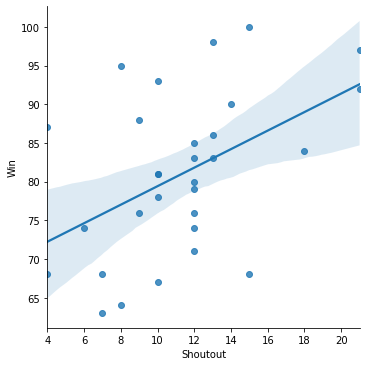

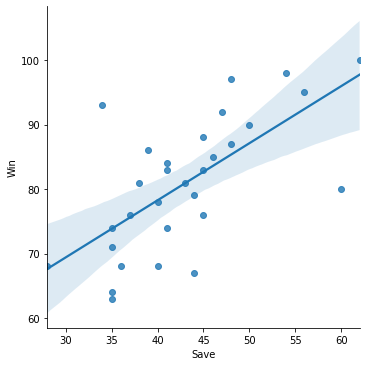

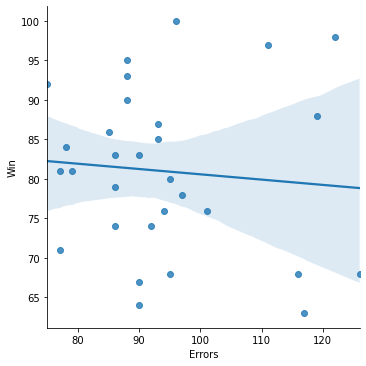

In [45]:
for i in df:
    sns.lmplot(x = i , y ='Win' , data = df)

From above plot we can see that runs,at_bats,Doubles,Triples,Home_runs,walks,Strike out,Stolen bases are directly proportional to chances of winning.
Hits is not much impacted by Wins. Runs,Earned_runs,Earned runs average is also inversely proportional to Wins for opponent team, 
Wins is somewhat affected by the number of Complete Games, Wins is slightly affected by shut outs and Wins is directly propertional to Saves.

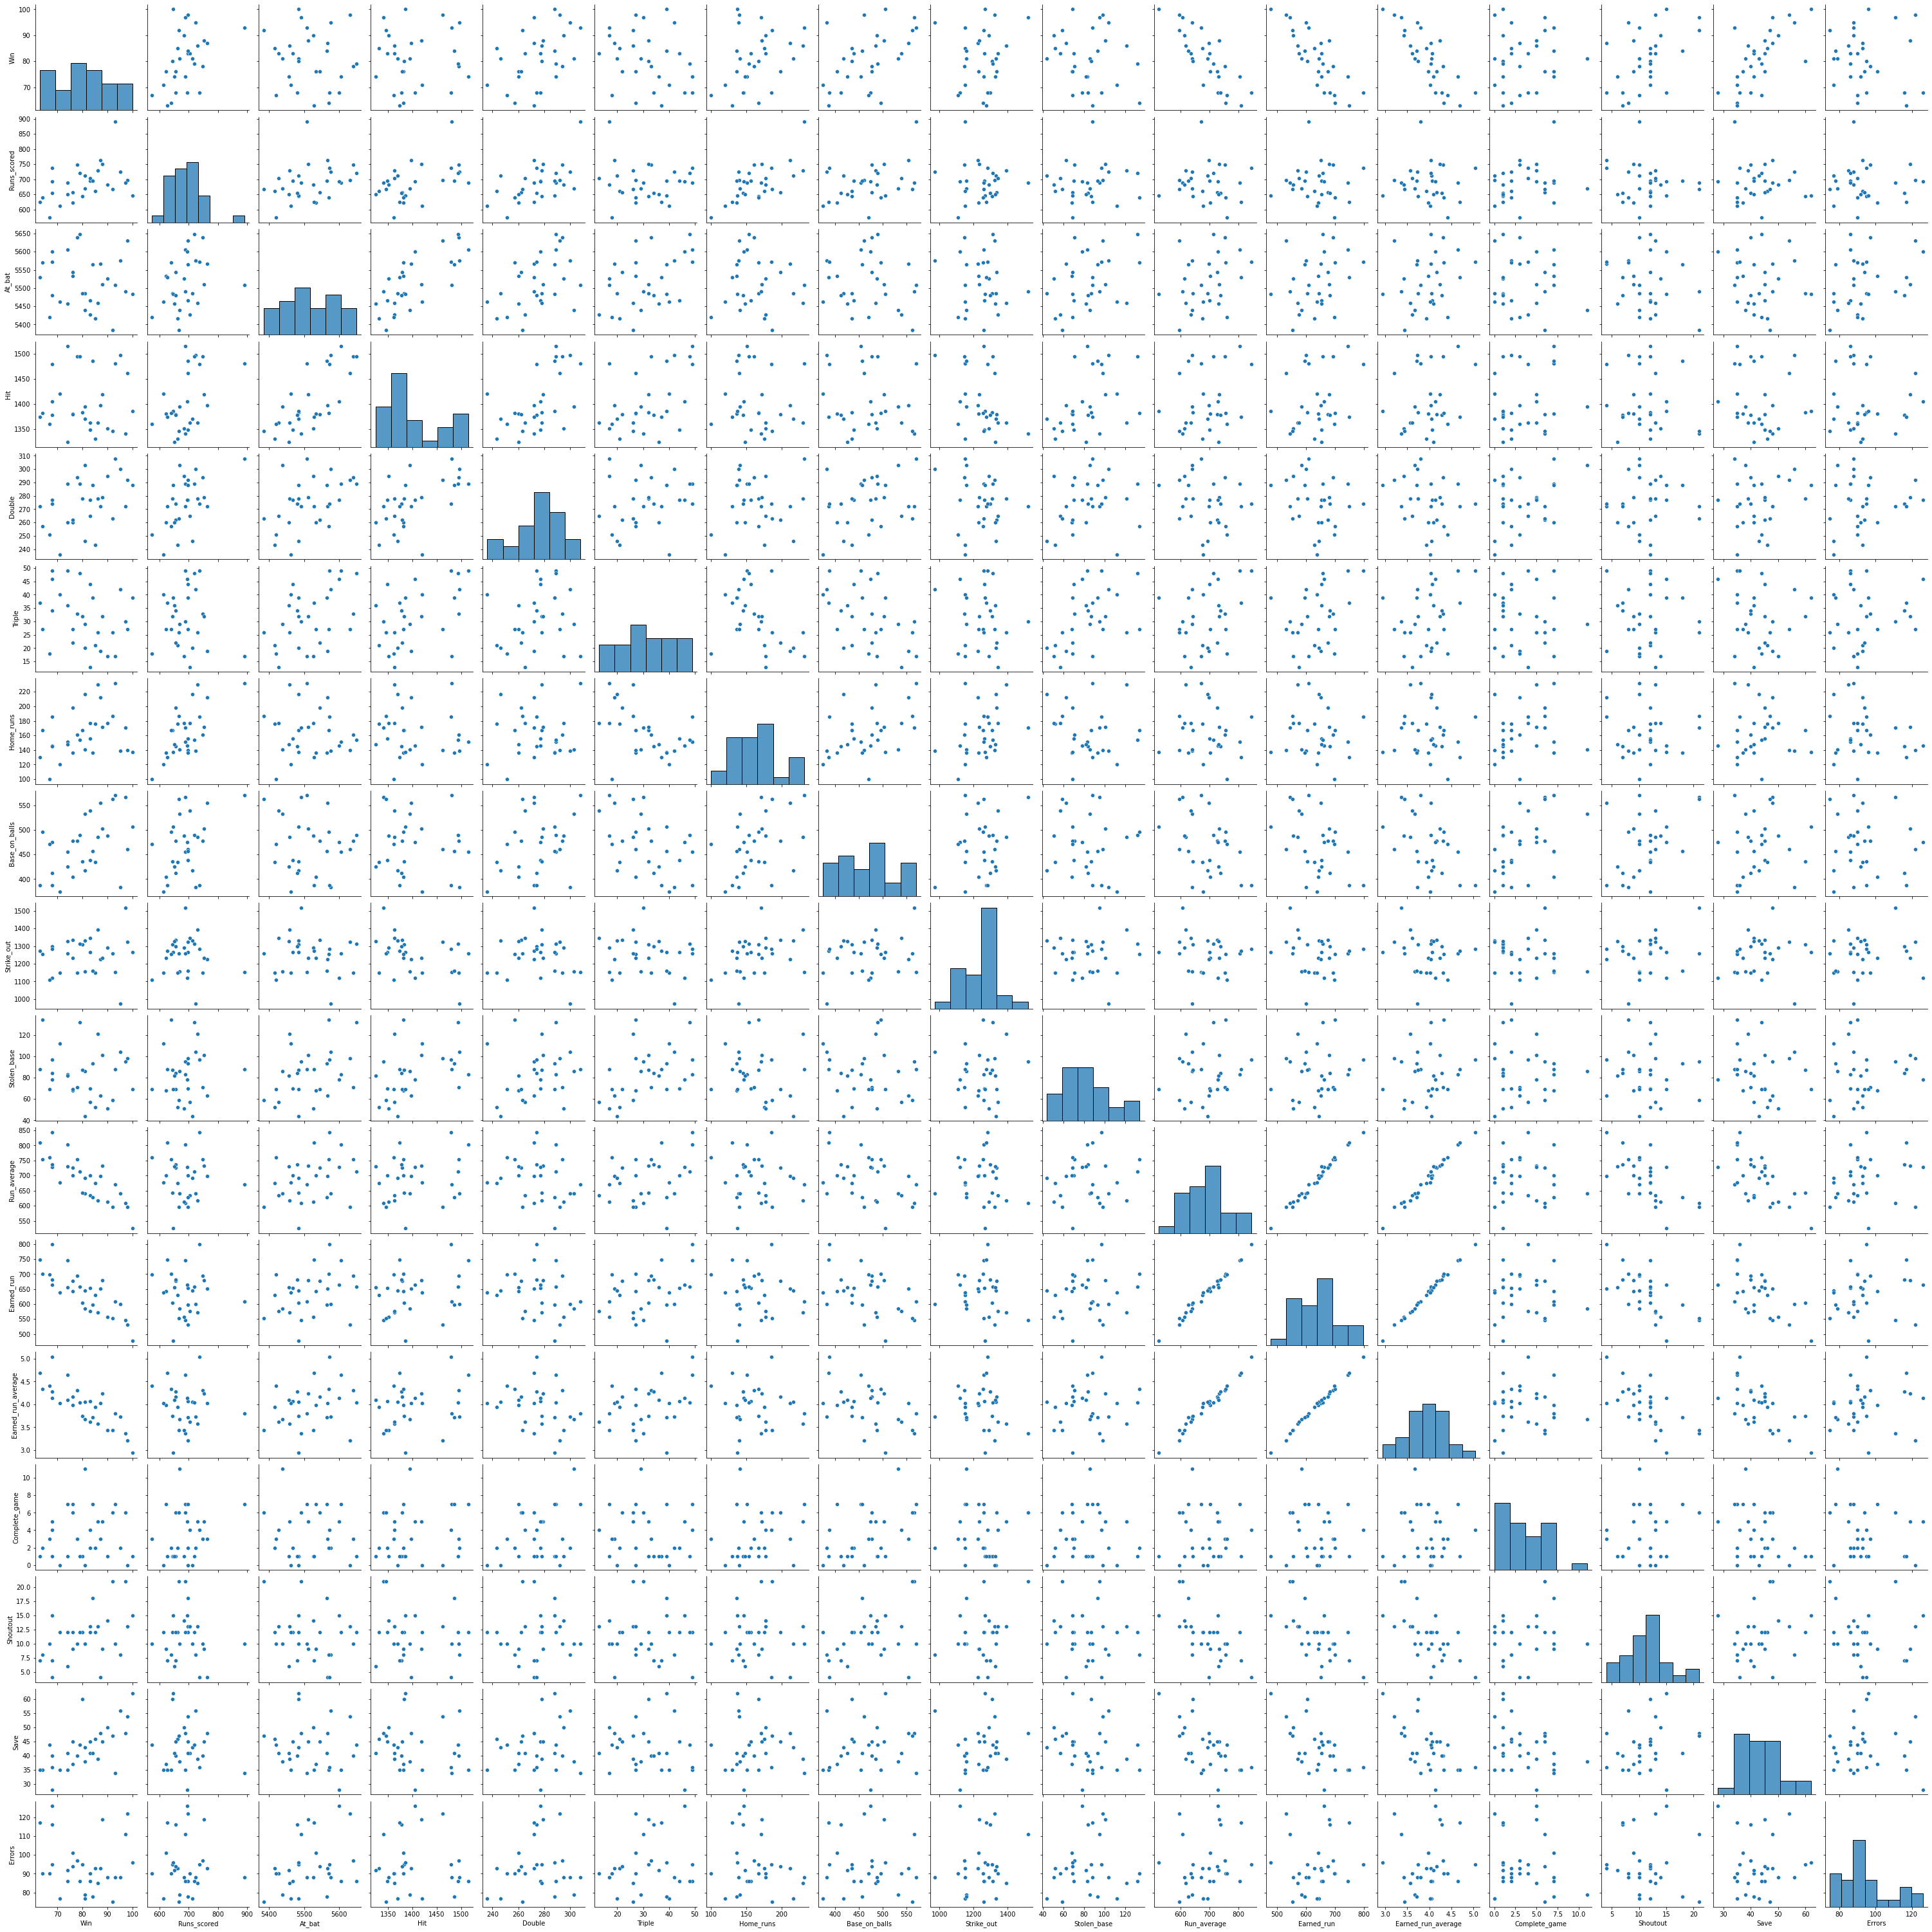

In [46]:
sns.pairplot(df) #shows multiple pairwise bivariate distributions in a dataset and shows relationship bw them.

The pair-plot gives image which is not clearly visible due to the large no of columns.From the plot,
the it shows strong collinearity and high varaince may be due to overfitting/biasesness ,as the images are same mostly.But we need to check other correlataion map like heatmaps to be asertain.We have very less number of samples and there are to many number of features in the data.


<AxesSubplot:title={'center':'Correlation Matrix'}>

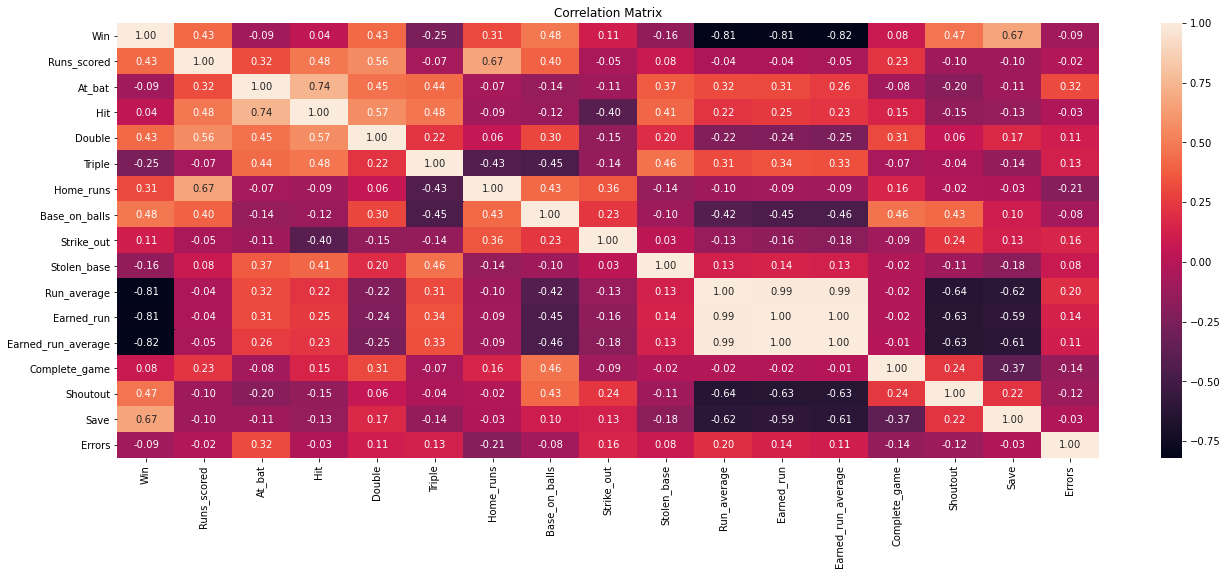

In [47]:
plt.figure(figsize=(22,8))
plt.title("Correlation Matrix")
sns.heatmap(df.corr(),annot=True,fmt='.2f')

Thus we see that 
1.run_average and earned_run_average are higly correlated at 99% .
2.run_average and earned_run are higly correlated at 99%.
3.earned_run_average and earned_run are higly correlated at 100%
This shows multicollinearity which will be checked later.

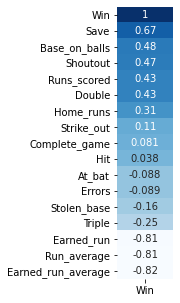

In [48]:
#Correlation btw variables and target
plt.figure(figsize=(1,5))
sns.heatmap(
    df.corr(method='pearson')[['Win']].sort_values('Win', ascending=False), 
    annot=True, cbar=False, cmap='Blues')
plt.show()

Thus Win is 67% correlated with Save, 48% correlated with base_on_balls,47% correlated with
shoutout and its least correlated with earned_run_average and run_average and earned_run.

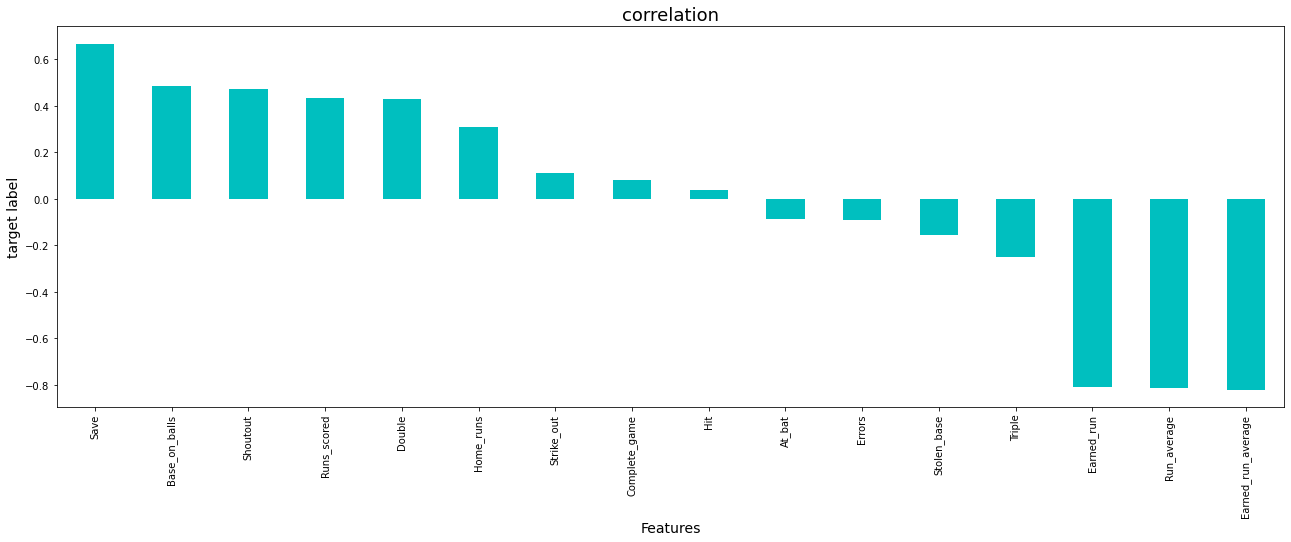

In [49]:
#bar plot showing correlation bw target and features
plt.figure(figsize=(22,7))
df.corr()['Win'].sort_values(ascending=False).drop(['Win']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('target label',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Target variable is positively correlated to save,shoutout,base_on_balls,runs-scored,double,home_runs,strike_out
and it is negatively correlated errors,at_bat,stolen_base,triple,earned_run,run_average,earned_run_average.

# Removal of Outliers using Z Score method

In [50]:
#Removing outliers
df.shape

(30, 17)

In [51]:
from scipy.stats import zscore
dfzcore=np.abs(zscore(df))
print(np.where(dfzcore>3)) #those coeffiecients value  greater than 3 are displayed as outliers.

(array([5], dtype=int64), array([1], dtype=int64))


In [52]:
#Removing outliers
dfnew=df[(dfzcore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)
df=dfnew

dfnew.shape= (29, 17)


In [53]:
#Percentage data loss
Data_loss=((30-29)/30)*100
Data_loss

3.3333333333333335

Thus we see percentage data loss is around 3.33% but since the datasamples are very less, i am considerering the outliers
to see whats effect it going to produce in my  model.

In [54]:
#reassinging the changed dataframe to original dataframe
df=dfnew.copy()

# Splitting the dataset into 2 variables into 'x' and 'y' for feature and Target

In [55]:
x = df.drop('Win', axis=1)
y = df['Win']

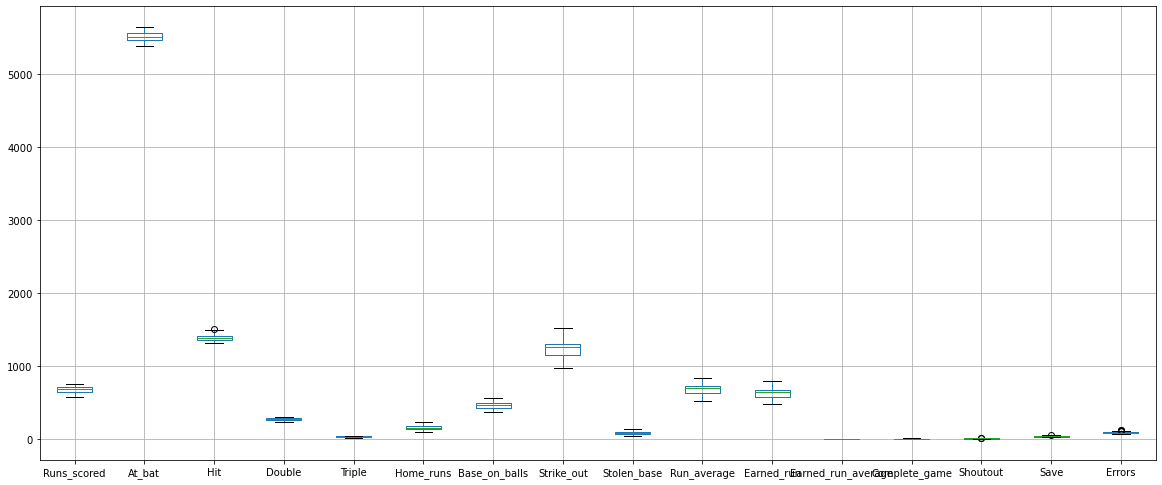

In [56]:
#validating through box plot
x.iloc[:,0:16].boxplot(figsize=[20,10])   
plt.subplots_adjust(bottom=0.25)
plt.show()

its not dat visible but can be find out that outliers have been reduced.

# Feature Scaling

In [57]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Runs_scored,At_bat,Hit,Double,Triple,Home_runs,Base_on_balls,Strike_out,Stolen_base,Run_average,Earned_run,Earned_run_average,Complete_game,Shoutout,Save,Errors
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.363013,0.159299,-1.090948,-0.614898


I have used StandardScaler method for scaling the datasets  as our datasets are normalized distributed and it bring all the data under the same scale.This will help us to analyze and feed the data to the models.

# Addressing Multicollinearity via Variance inflation factor(VIF)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,Runs_scored,7.229564
1,At_bat,18.333377
2,Hit,10.558458
3,Double,3.743423
4,Triple,3.278636
5,Home_runs,8.426403
6,Base_on_balls,3.431971
7,Strike_out,2.720640
8,Stolen_base,2.110804
9,Run_average,197.315706


Thus we see that 'At_bat','Errors','stolen_base','triple','earned_run','run_average','earned_run_average' are negatively correlated with 'Win' and rest are positively correlated with 'Save' as maximum correlated then next 'base_on_balls' and 'shoutout' with 'Win'. 

#FEATURE ENGINEERING-SELECTION OF FEATURES/VARIABLES via VIF analysis
Observation:
Run_average,Earned_run,Earned_run_avergae shows high VIF relative to others.
Now we have to analyse which feature to drop in comapriosn with Win.We need to check wrt to Win 
among those selected features which contribute less to Win and will drop.
Thus companring with correlation chart above,Earned_run and Earned_run_avergae show collinearity between and
they are contributing less towards Win,so I deciced to drop them.


In [59]:
x1=x.drop(['Earned_run','Earned_run_average'],axis=1)
x=x1.copy()
x

,Runs_scored,At_bat,Hit,Double,Triple,Home_runs,Base_on_balls,Strike_out,Stolen_base,Run_average,Complete_game,Shoutout,Save,Errors
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.363013,0.159299,-1.090948,-0.614898
5,1.856900,0.716535,-0.070480,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,-0.128586,-1.785822,0.601593,-0.111574
6,0.712585,-0.447345,-0.558853,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,-1.247285,-0.326982,-0.049384,-1.262029
7,-0.835605,-0.447345,-0.323710,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.874386,0.159299,2.163939,0.032233
8,1.497899,1.752672,1.702131,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,-0.128586,-0.326982,-0.439971,0.176039
9,1.565212,-0.078310,0.327453,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.617213,-0.570122,0.211006,1.757915


Thus we see most of the outliers have been removed from errors and still there are one each outlier present in strike_out and shoutout,so we are not removing it.


In [60]:
#checking skewness
x.skew()

Runs_scored     -0.215364
At_bat           0.169573
Hit              0.783772
Double          -0.335304
Triple           0.090124
Home_runs        0.450862
Base_on_balls    0.151193
Strike_out      -0.233815
Stolen_base      0.494966
Run_average      0.018155
Complete_game    0.854980
Shoutout         0.526943
Save             0.627480
Errors           0.840271
dtype: float64

1)In geenral.If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
2)In general,if the skewness is less than -1 (negatively skewed) or greater than 1 (positively skewed), the data are highly skewed.
So considering the skewness range as above some of the datas are outside the range as skewness reflected.

# Power Transformation for removing skewness 

In [61]:

from sklearn.preprocessing import PowerTransformer
p_trans = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(p_trans.fit_transform(x), columns=x.columns)
x.head(10)

,Runs_scored,At_bat,Hit,Double,Triple,Home_runs,Base_on_balls,Strike_out,Stolen_base,Run_average,Complete_game,Shoutout,Save,Errors
0,0.963707,0.845876,1.499763,1.697183,1.009778,-0.750987,-1.585809,-2.526137,0.937834,-0.663998,-0.385028,-0.810680,1.514034,-0.346313
1,0.295859,-0.683111,-1.070000,0.126666,1.196381,-0.093861,-0.472146,0.081550,-0.533875,0.155687,-0.385028,0.244657,0.331534,-0.549115
2,-0.313548,-1.119638,0.155823,1.919337,-0.250342,-0.670158,1.235978,-0.930297,0.227205,-0.677903,2.093604,-0.258761,-0.674188,-1.351095
3,-1.301805,0.282542,-0.162796,-0.832261,-0.453766,-0.873813,-1.161862,-0.241165,-0.637862,0.169564,1.302758,-0.529410,-0.837196,0.663652
4,0.134108,1.231871,1.655806,0.913667,1.657225,-0.279688,-0.165631,0.031877,0.095191,1.583147,1.302758,0.244657,-1.175343,-0.549115
5,1.961812,0.740884,0.197244,-0.174043,-1.287587,1.610164,1.595463,-0.279511,-0.905181,0.127930,0.082864,-2.023134,0.688013,0.105425
6,0.697760,-0.409862,-0.447259,-1.529125,-1.181854,1.742136,-0.883192,0.769568,-2.004928,0.058528,-1.549601,-0.258761,0.071101,-1.605267
7,-0.847812,-0.409862,-0.114259,0.188972,0.049879,0.289273,-0.530301,0.549897,0.270116,-0.650092,-0.931324,0.244657,1.882659,0.262655
8,1.557315,1.669365,1.481570,1.263403,0.148462,0.084835,0.262265,-1.011679,-0.482543,0.890628,0.082864,-0.258761,-0.361322,0.406633
9,1.632662,-0.027465,0.589733,0.251940,0.049879,0.452466,0.711739,-0.221936,0.826949,0.613417,0.783547,-0.529410,0.331534,1.531256


#Thus yeo-johnson methos is used as power trandform method as it works for both positve and negative value 
#whereas box-cox works on positive value.Thus this will remove any skewness in the dataset.The value of AT_bat and Hit is 0 as the it is fully normalized datas. 

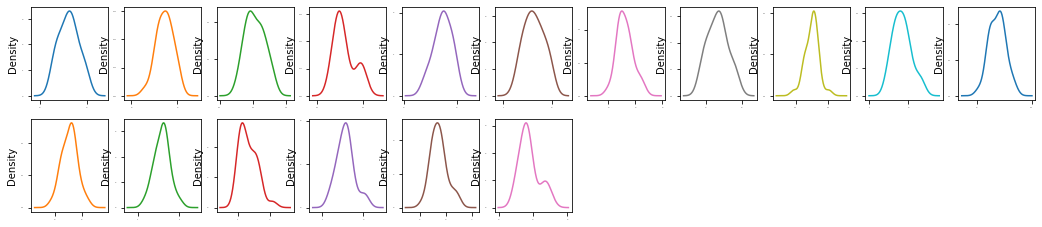

In [62]:
# checking distribution plot
df.plot(kind="density",subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

Thus we see that mostly columns are showing a bell shape curve indicating gaussian distribution or normalized distribution.

# Finding best random state for building Regression Models

In [63]:
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [64]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9485642598455429 on Random State 838


Best r2 score is 0.941129627124454 on Random State 838 so we will take this

# Base Model:Linear Regression

# Creating the training and testing data sets

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=838)

In [66]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([ 2.19676169,  1.6070653 ,  0.08966702, -1.75768319,  0.63376308,
        1.28296954, -1.39345579,  0.36316503, -0.17974909, -4.28850293,
        2.14756382,  1.81691031,  7.03816075,  1.21809088])

In [67]:
#making dataframe :more distinguisable:- features with its coefficient value
features=['Runs_scored','At_bat','Hit','Double','Triple','Home_runs','Base_on_balls','Strike_out','Stolen_base','Run_average',
          'Complete_game','Shoutout','Save','Errors']
list(zip(features,lr.coef_))  
cfdf=pd.DataFrame(data=lr.coef_,index=features)
cfdf

,0
Runs_scored,2.196762
At_bat,1.607065
Hit,0.089667
Double,-1.757683
Triple,0.633763
Home_runs,1.282970
Base_on_balls,-1.393456
Strike_out,0.363165
Stolen_base,-0.179749
Run_average,-4.288503


In [68]:
lr.intercept_

81.15555220448819

In [69]:
#training the model
lr.score(x_train,y_train)

0.9586848886750646

In [70]:
#predicting train
pred_train=lr.predict(x_train)
pred_train

array([ 70.40092955,  72.02990174,  82.19460518,  97.12924753,
        85.9879097 ,  85.01322125,  82.52999646, 100.06617903,
        86.63978911,  95.85315866,  68.17090998,  86.99142866,
        82.66142062,  72.4338591 ,  76.46029241,  68.68279294,
        88.42083072,  86.18382585,  68.14970151])

In [71]:
#predicting y_test
pred_test=lr.predict(x_test)
pred_test

array([85.86674893, 71.07090129, 66.37935959, 82.42489516, 90.25049046,
       78.56899642, 62.46569358, 93.36550216, 72.73078513, 94.38764121])

In [72]:
print("Predicted values",pred_test)

Predicted values [85.86674893 71.07090129 66.37935959 82.42489516 90.25049046 78.56899642
 62.46569358 93.36550216 72.73078513 94.38764121]


In [73]:
#creating dataframe of the predicted value
preddf=pd.DataFrame(data=pred_test)
preddf

,0
0,85.866749
1,71.070901
2,66.379360
3,82.424895
4,90.250490
5,78.568996
6,62.465694
7,93.365502
8,72.730785
9,94.387641


In [74]:
#testing the model
lr.score(x_test,y_test)

0.6235677402944584

Testing accuracy score is 0.6235677402944584

In [75]:
print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
print("Mean squared error :",mean_squared_error(y_test,pred_test))
print("Root mean error :",np.sqrt(mean_squared_error(y_test,pred_test)))
print("R2_Score",r2_score(y_test,pred_test))

Mean absolute error : 4.303628095722156
Mean squared error : 39.450100817140765
Root mean error : 6.280931524633966
R2_Score 0.6235677402944584


Mean absolute error : 4.303628095722156
Mean squared error : 39.450100817140765
Root mean error : 6.280931524633966
R2_Score 0.6235677402944584

# cross_validation of the model

In [77]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold :",j)
    print("The CV score is :",cv_mean)
    print("The accuracy score for training :",Train_accuracy)
    print("The accuracy score for testing :",Test_accuracy)
    print("\n")

At cross fold : 2
The CV score is : -14.6047367494459
The accuracy score for training : 0.9586848886750646
The accuracy score for testing : 0.6235677402944584


At cross fold : 3
The CV score is : 0.19838432473765108
The accuracy score for training : 0.9586848886750646
The accuracy score for testing : 0.6235677402944584


At cross fold : 4
The CV score is : 0.4306388219611376
The accuracy score for training : 0.9586848886750646
The accuracy score for testing : 0.6235677402944584


At cross fold : 5
The CV score is : 0.30732758655664305
The accuracy score for training : 0.9586848886750646
The accuracy score for testing : 0.6235677402944584


At cross fold : 6
The CV score is : 0.2946456264926518
The accuracy score for training : 0.9586848886750646
The accuracy score for testing : 0.6235677402944584


At cross fold : 7
The CV score is : 0.09643478130630277
The accuracy score for training : 0.9586848886750646
The accuracy score for testing : 0.6235677402944584


At cross fold : 8
The CV s

We see that cross validation score is 43% at cv=4 is better compare to others cv.So the final accuracy is 43%

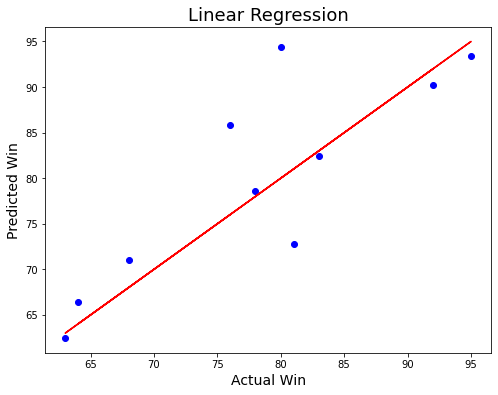

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Win",fontsize=14)
plt.ylabel("Predicted Win",fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

Thus we can see the best fit line which slightly touching two datapoints ,we need to improve more by regularization and hyperparameter technique.
There are some datapoint bottom corner of best fit line,which can increse the mse error
so we need to regularise and improve the r2_score

# REGULARIZATION

In [79]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score

In [80]:
rdg=Ridge(alpha=0.001,random_state=838)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.9586848774362788

In [84]:
predict=rdg.predict(x_test)

In [85]:
r2_score(y_test,predict)

0.6236388844607255

r2_score for ridge is 0.6236388844607255 

In [86]:
# model training
ls=Lasso(alpha= 0.1, random_state= 838)
ls.fit(x_train,y_train)   
ls_score_training=ls.score(x_train,y_train) 
pred_ls=ls.predict(x_test) 
ls_score_training*100       

95.3736636228523

In [87]:
lso=Lasso(alpha=0.0001,random_state=838)
lso.fit(x_train,y_train)
lso.score(x_train,y_train)

0.9586848829320898

In [88]:
predict1=lso.predict(x_test)

In [89]:
r2_score(y_test,predict1)

0.6236578874173957

r2_score for Lasso is 0.6236578874173957

# Modeling without tuning

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error 

In [91]:
rfr = RandomForestRegressor(random_state=838)
dtr = tree.DecisionTreeRegressor(random_state=838)
xg = XGBRegressor(random_state=838)
svr=SVR()
knnr = KNeighborsRegressor()
lr = LinearRegression()
lsr = linear_model.Lasso(random_state = 838)
rr = linear_model.Ridge(random_state=838)
ada= AdaBoostRegressor()
gdb=GradientBoostingRegressor()

models=[lr,lsr,rr,svr,rfr,ada,gdb,dtr,knnr,xg]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
adjR2_train=[]
adjR2_test=[]
mape=[]

k = len(x_test)
n = len(y)

for i in models:  
    i.fit(x_train,y_train)
    r2_train = round(i.score(x_train, y_train),3)
    r2_test = round(i.score(x_test, y_test),3)
    scores_train.append(round(r2_train,3))
    scores_test.append(round(r2_test,3))
    y_pred = i.predict(x_test)
    mape.append(round(mean_absolute_percentage_error(y_test, y_pred)*100,3))
    rmse_train.append(round(np.sqrt(mean_squared_error(y_train,i.predict(x_train))),3))
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test,i.predict(x_test))),3))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Train R2': scores_train,'Test R2': scores_test, 'MAPE':mape},
            index=['Linear Regression','Lasso Regression','SVR Regression','AdaBoost Regression','GradientBoosting Regression','Ridge Regression','Random Forest Regression','Decision Tree Regression', 'KNN Regression','XGB Regression']))

                             Train RMSE  Test RMSE  Train R2  Test R2    MAPE
Linear Regression                 2.017      6.281     0.959    0.624   5.530
Lasso Regression                  3.305      4.295     0.889    0.824   4.396
SVR Regression                    2.161      5.760     0.953    0.683   5.502
AdaBoost Regression               8.741     10.306     0.224   -0.014  11.589
GradientBoosting Regression       2.606      6.957     0.931    0.538   7.492
Ridge Regression                  0.542      6.614     0.997    0.583   7.733
Random Forest Regression          0.002      8.408     1.000    0.325   9.329
Decision Tree Regression          0.000     10.459     1.000   -0.044  11.393
KNN Regression                    5.767      7.370     0.662    0.482   8.423
XGB Regression                    0.000      7.655     1.000    0.441   8.204


Observation:
For Linear Models, the MAPE(Mean absolute percentage error) states that the predicted values are ~4-5% away from actuals with Lasso as best among linear models with MAPE of 4.3% and low rmse as 0.824.

For Non-Linear Models / ensemble models, Decision Tree models overfits. Support Vector Regressor are the best model among non-linear models,with approx lowest RMSE score and MAPE. SVR is having lowest MAPE(5.5%) with low test_rmse 5.7 and high test r2 score of SVR:68%, So we will taking Linear,Lasso and SVR for hyperparameter tuning through gridsearchcv which are best models compare from others.

RMSE indicates the absolute fit of the model or spread out of residual.
R2 indicates proportion of variance for a dependent variable that is explained by independent variables.
Both RMSE and R2 are relative measure of fit.
MAPE indicates to what extent predicated values are away from actual.

# HYPERPARAMETER TUNING THROUGH GRIDSEARCHCV

So now we are going to fine-tune the hyperparameters using GridSearchCV on SVR model(Support Vector Regressor). 
GridSearchCV automatically tunes the hyperparameters with the parameters specified to find the best parameters and the best estimator,
this helps us from manually having to tune, which would take a lot of time.

In [92]:
from sklearn.model_selection import GridSearchCV

# Support Vector Regression
from sklearn.svm import SVR
parameters={ 'kernel' :["linear", "rbf"],
              'gamma' :["scale", "auto"],
              'C' : [2.0, 4.0],
              'epsilon' :[0.2, 0.4],      
            }

svr=SVR()
clf=GridSearchCV(svr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
#{'C': 2.0, 'epsilon': 0.4, 'gamma': 'scale', 'kernel': 'linear'}

{'C': 2.0, 'epsilon': 0.4, 'gamma': 'scale', 'kernel': 'linear'}


In [94]:
#fitting the best parameters
svr=SVR(C=2.0, epsilon= 0.4, gamma='scale', kernel='linear')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_test=svr.predict(x_test)

svs=r2_score(y_test,pred_test)
print('R2 Score',svs*100)

svscore=cross_val_score(svr,x,y,cv=8)
svc=svscore.mean()
print('Cross Val Score:',svc*100)

R2 Score 54.88273958575417
Cross Val Score: 35.80280798108739


Thus we see that  R2 Score is 54.88% and cross val score is 35% after hyperparamter tuning.

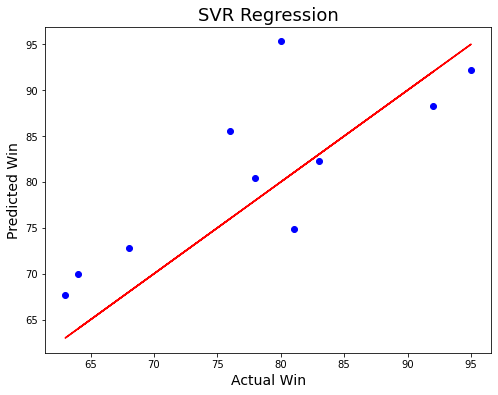

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Win",fontsize=14)
plt.ylabel("Predicted Win",fontsize=14)
plt.title("SVR Regression",fontsize=18)
plt.show()

 #This is the best fit curve using SVR.

In [97]:
from sklearn.model_selection import GridSearchCV

# Linear Regression
parameters={ 'fit_intercept' : [True, False],
              'normalize' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],
              'n_jobs' : [-2, -1, 1],            
            }

lnr=LinearRegression()
clf=GridSearchCV(lnr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -2, 'normalize': True, 'positive': True}


In [98]:
#fitting the best parameters
lnr=LinearRegression(copy_X=True,fit_intercept=True, n_jobs= -2,normalize=True,positive=True )
lnr.fit(x_train,y_train)
lnr.score(x_train,y_train)
pred_test=lnr.predict(x_test)
lvs=r2_score(y_test,pred_test)
print('R2 Score',lvs*100)

lvscore=cross_val_score(lnr,x,y,cv=8)
lvc=lvscore.mean()
print('Cross Val Score:',lvc*100)

R2 Score 33.54190370862356
Cross Val Score: 7.538477521826251


Thus we see that R2 Score is 33.54% and cross val score is 7.53% after hyperparamter tuning.

In [99]:
from sklearn.model_selection import GridSearchCV

# Lasso Regression
parameters={ 'fit_intercept' : [True, False],
              'normalize' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],                     
            }

lass=linear_model.Lasso()
clf=GridSearchCV(lass,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'copy_X': True, 'fit_intercept': True, 'normalize': False, 'positive': True}


In [100]:
#fitting the best parameters
lass=linear_model.Lasso(copy_X=True,fit_intercept=True, normalize=False,positive=True )
lass.fit(x_train,y_train)
lass.score(x_train,y_train)
pred_test=lass.predict(x_test)
lass_s=r2_score(y_test,pred_test)
print('R2 Score',lass_s*100)

lass_score=cross_val_score(lass,x,y,cv=8)
lass_c=lass_score.mean()
print('Cross Val Score:',lass_c*100)

R2 Score 60.12653970762971
Cross Val Score: 18.221939024085238


Thus we see that R2 Score is 60.12% and cross val score is 18.22% after hyperparamter tuning.

So out of the three models,we choosen SVR as the R2 score is 54% and
cross val score is 35% which are better among other models and also the gap berween cross validation score and r2score is less  in SVR in comparing to other models,so saving the SVR as best model.  

# Saving the model :Support Vector Regressor :Best Model

In [101]:
import pickle
filename='baseball.pkl'
pickle.dump(svr,open(filename,'wb'))

# Conclusion :Prediction Test

In [102]:
loaded_model=pickle.load(open('baseball.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

54.88273958575417


# Prediction Result

In [103]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9
Predicted,85.571842,72.816126,69.950411,82.320850,88.279931,80.402223,67.720147,92.172651,74.825771,95.301655
Original,84.636027,72.609961,70.382002,84.770333,91.048179,81.307824,68.093537,89.486760,75.009184,93.194683
